<a href="https://colab.research.google.com/github/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%202/Laboratorio_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cursos.virtual.uniandes.edu.co/isis4219/wp-content/uploads/sites/162/2014/11/cropped-misisheader.png" ><br>
# Machine Learning Techniques - ISIS4219

Intersemestral 2020




## Objetivos

*   Aprender los diferentes tipos de regularizadores dentro de una Regresión.
*   Aprender a entonar los hiperparámetros de un modelo.
*   Resolver un problema real de probabilidad según unas variables establecidas.



## Primer Problema
<p style="text-align: justify;"> En el mercado inmobiliario, un aspecto que resulta de gran interés es cómo identificar rápidamente las oportunidades de inversión. Los precios de las viviendas pueden aumentar o caer rápidamente, pero los sitios online disponibles, que ofrecen casas en venta o alquiler, no se actualizan con la misma celeridad. Por otra parte, las personas que utilizan estas facilidades en línea lo hacen con el objetivo de obtener una buena recomendación sobre el monto para la transacción, pero estos sitios, al no tener un mecanismo de actualización de precios, no pueden suministrar apoyo en tiempo real para satisfacer tales requerimientos. Una de estas empresas desea desarrollar una aplicación que permita estimar el precio de mercado de casas de manera automática en función de la realidad del mercado. Un aspecto importante para ellos es poder identificar las características más relevantes que permitan alcanzar un alto rendimiento predictivo.</p>

### 1. Importando las librerias requeridas para el desarrollo del laboratorio

Para el manejo de los datos se van a utilizar las librerías de `Pandas` y para la visualización y perfilamiento se utilizará la librería `pandas-profiling`. En caso de no tener la librería en el ambiente de desarrollo, puede utilizar el siguiente comando.
```python
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
````

Además, para la preparación de los datos, entrenamiento del modelo y evaluación se utilizará la librería `scikit-learn`. <br>
Por último, para visualización de los datos se utiliza la librería `matplotlib`.

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import numpy as np


### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos
Primero, se leen los datos y se visualizan que se hayan leido correctamente.

In [3]:
url = 'https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%201/kc_house_data.csv'
data = pd.read_csv(url)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Entendimiento de los Datos

A continuación se describe el diccionario de datos del dataset.

| Nombre | Descripción |
| --- | --- |
|id:| a notation for a house.|
|date:| Date house was sold.|
|price:| Price is prediction target.|
|bedrooms:| Number of Bedrooms/House.|
|bathrooms:| Number of bathrooms/House.|
|sqft_living:| square footage of the home.|
|sqft_lotsquare:| footage of the lot.|
|floors:| Total floors (levels) in house.|
|waterfront:| House which has a view to a waterfront.|
|view:| Has been viewed.|
|condition:| How good the condition is ( Overall ).|
|gradeoverall:| grade given to the housing unit, based on King County grading system.|
|sqft_above:| square footage of house apart from basement.|
|sqft_basement:| square footage of the basement.|
|yr_built:| Built Year.|
|yr_renovated:| Year when house was renovated.|
|zipcode:| zip.|
|lat:| Latitude coordinate.|
|long:| Longitude coordinate.|
|sqft_living15:| Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.|
|sqft_lot15:| lotSize area in 2015(implies-- some renovations).|


Para visualizar la distribución, los valores que toman los datos, la cantidad de ceros o nulos, el tipo de dato y la correlación entre ellos, se utiliza `pandas-profiling`.

In [4]:
#ProfileReport(data)

### 3. Limpieza y preparación de datos

#### 3.1 Tratamiento de datos atípicos

Se identifica en el perfilamiento que los siguientes campos posiblemente tienen datos atípicos:
* Price
* Bedrooms
* Sqft_living

In [5]:
def outlier_cleaning(data):
  # Cleaning price
  data = data[np.abs(data.price - data.price.mean()) <= ( 3 * data.price.std())]
  data = data[~(np.abs(data.price - data.price.mean()) > (3 * data.price.std()))]

  # Cleaning  bedrooms
  data = data[np.abs(data.bedrooms - data.bedrooms.mean()) <= ( 3 * data.bedrooms.std())]
  data = data[~(np.abs(data.bedrooms - data.bedrooms.mean()) > (3 * data.bedrooms.std()))]

  # Cleaning sqft_living
  data = data[np.abs(data.sqft_living - data.sqft_living.mean()) <= ( 3 * data.sqft_living.std())]
  data = data[~(np.abs(data.sqft_living - data.sqft_living.mean()) > (3 * data.sqft_living.std()))]

  return data

#### 3.2 Selección de campos

Primero, se construyen los conjuntos X y Y que van a ser utilizados en el modelo. Dado que queremos predecir el precio, la variable predictora (Y) tendrá el precio de los inmuebles. Y se utilizarán como variables descriptoras (X) las proporcionadas por el conjunto de dats excepto `id`, `date` y `zipcode` debido a que no son realmente descriptoras del problema, Además, como se muestra en la tabla de correlación, se establece un umbral de $0.8$ para establecer autocorrelación. Por ello, se decide eliminar la variable `sqft_above`.

In [6]:
columns = ['id','date','zipcode','sqft_above']

In [7]:
def data_selection(data, columns):
  data = data.drop(columns,axis=1)
  return data

In [8]:
data = data.pipe(outlier_cleaning).pipe(data_selection,columns)

In [9]:
X = data.drop(['price'],axis=1)
y = data['price']

#### 3.3 Estandarización de campos

Debido a que los algoritmos de regresión se ven afectados por la escala en la que se encuentra cada uno de los atributos, es necesario aplicar una transformación para que todos queden en la misma escala.

In [10]:
columns = X.columns

In [11]:
from sklearn.pipeline import Pipeline

pipeline_cleaning = Pipeline([
 ('normalization', MinMaxScaler(feature_range=(0, 1))),
 ])

In [12]:
X = pipeline_cleaning.fit_transform(X)

In [13]:
X = pd.DataFrame(X,columns=columns)

Con las variables definidas, se procede a construir los conjuntos de entrenamiento y test.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### 4. Modelamiento

#### **Regresión Linear Regularizada**

La regularización ayuda a resolver el problema de sobreajuste, lo que implica que el modelo funciona bien en los datos de entrenamiento pero tiene un mal desempeño en los datos de validación (prueba). 

La regularización resuelve este problema al agregar un término de penalización a la función objetivo y controlar la complejidad del modelo utilizando ese término de penalización.

La regularización es generalmente útil en las siguientes situaciones:

*   Gran cantidad de variables
*   Baja relación de observaciones numéricas a número de variables
*   Alta multicolinealidad


#### **Regresión Ridge**

* La regresión Ridge (cresta) o la *regresión por contracción* hace uso de la regularización de L2. 

* En la regularización de L2 intentamos minimizar la función objetivo agregando un término de penalización(alpha) a la suma de los cuadrados de los coeficientes. 

* Generalmente, a mayor valor de alpha más regularización por lo tanto el modelo se simplifica más.

In [15]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.5).fit(X_train, y_train)

##### **Predicción**

In [16]:
list(zip(X_train, RidgeModel.coef_))

[('bedrooms', -57259.33219768372),
 ('bathrooms', 134123.83945327933),
 ('sqft_living', 320554.2725793827),
 ('sqft_lot', 321114.89596954675),
 ('floors', 79515.0266684557),
 ('waterfront', 127282.13187094455),
 ('view', 138984.3241836487),
 ('condition', 117858.57858041623),
 ('grade', 682482.5723889129),
 ('sqft_basement', 4161.982782422322),
 ('yr_built', -207423.12968102682),
 ('yr_renovated', 36340.78927449463),
 ('lat', 331258.0472429203),
 ('long', -34855.05293488511),
 ('sqft_living15', 272960.9311826615),
 ('sqft_lot15', -79216.47906834094)]

In [17]:
RidgePredictions = RidgeModel.predict(X_test)

##### **Validación**

In [18]:
r2_score(y_test, RidgePredictions)

0.6841334221144469

In [19]:
GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

NameError: name 'GridSearchCV' is not defined

#### **Regresión Lasso** (Least Absolute Shrinkage and Selection Operator)

In [20]:
from sklearn.linear_model import Lasso

LassoModel = Lasso().fit(X_train, y_train)

##### **Regularización L1**

La regresión de lazo hace uso de la regularización L1. 

En la regularización L1 intentamos minimizar la función objetivo agregando un término de penalización a la suma de los valores absolutos de los coeficientes. Esto también se conoce como método de desviaciones menos absolutas.

##### **Predicción**

In [21]:
LassoPredictions = LassoModel.predict(X_test)

##### **Validación**

In [22]:
r2_score(y_test, LassoPredictions)

0.6841732255224815

##### **Optimización de hiperparametros**

A continuación se establece la grilla de parametros a optimizar:

In [23]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

Si elegimos alpha = 0, volvemos a las estimaciones de mínimos cuadrados habituales. Si se elige lambda para que sea muy grande, dará lugar a un ajuste insuficiente. Por lo tanto, es muy importante determinar un valor deseable de lambda.

In [24]:
GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

Lasso(alpha=0.03)

Como se observa en la línea anterior un alpha de 0.03 genera una mejor capacidad de predicción. Por lo tanto el mejor modelo viene dado por:

In [25]:
LassoModel = Lasso(alpha=0.03).fit(X_train, y_train)

In [26]:
lassoPredictions = LassoModel.predict(X_test)

In [27]:
r2_score(y_test, lassoPredictions)

0.6841698530549931

In [28]:
ridge_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.04]}

In [29]:
list(zip(X_train, LassoModel.coef_))

[('bedrooms', -57240.49423988212),
 ('bathrooms', 134129.08514230515),
 ('sqft_living', 319403.23540916486),
 ('sqft_lot', 362445.2706949329),
 ('floors', 79443.6105699448),
 ('waterfront', 128474.95594817043),
 ('view', 138666.15025583073),
 ('condition', 118052.87527554375),
 ('grade', 685708.618890184),
 ('sqft_basement', 4307.990251675785),
 ('yr_built', -207849.92807452372),
 ('yr_renovated', 36276.578983829284),
 ('lat', 331311.9988600889),
 ('long', -35099.48273798961),
 ('sqft_living15', 273339.2387113439),
 ('sqft_lot15', -94640.61029983085)]

In [30]:
RidgeModel = Ridge(alpha=0.3).fit(X_train, y_train)

In [31]:
RidgePredictions = RidgeModel.predict(X_test)

In [32]:
r2_score(y_test, RidgePredictions)

0.6841511298511322

In [33]:
GridSearchCV(Ridge(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

Ridge(alpha=0.03)

#### **Lasso o Ridge?**

* En general, L2 funciona mejor que la 
regularización L1. L2 es eficiente en términos de cálculo. 

* Hay un área donde L1 se considera como una opción preferida sobre L2. L1 tiene una selección de características incorporada para espacios de características dispersos. Por ejemplo, está prediciendo si una persona tiene un tumor cerebral usando más de 20,000 marcadores genéticos (características). Se sabe que la gran mayoría de los genes tienen poco o ningún efecto sobre la presencia o gravedad de la mayoría de las enfermedades.
* La regresión de lazo puede realizar una selección de variables incorporada, así como la contracción de parámetros. Al usar la regresión de Ridge, uno puede terminar obteniendo todas las variables pero con Parámetros Reducidos.

## Segundo Problema


Uno de los grandes problemas de las redes sociales es la creación de perfiles falsos debido a que implica desde creaciones superficiales de seguidores hasta tráfico de influencias y suplantación de identidad, una de las redes sociales que cuenta con más cuentas falsas es Instagram. Para eso, se quiere identificar las características y la probabilidad de un usuario de Instagram sea clasificado como una cuenta 'real' o una cuenta 'spammer'.<br><br>
Para más información de los datos se encuentran en: https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts

### 1. Importando las librerias requeridas para el desarrollo del laboratorio

Adicionalmente a las librerías importadas anteriormente, se importa el método de `LogisticRegression` y `classification_report` de la librería `scklearn`.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos
Primero, se leen los datos y se visualizan que se hayan leido correctamente.

In [35]:
train = pd.read_csv("https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%202/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%202/Problema%202/test.csv")

#ProfileReport(train)

### 3. Preparación de los datos

Dado que ya se provee un conjunto de entrenamiento y un conjunto de test, se procede a separar las variables descriptoras y la variable a predecir.

In [36]:
X_train, Y_train = train.drop(['fake'],axis=1), train['fake']
X_test, Y_test = test.drop(['fake'],axis=1), test['fake']
display(X_train.head())

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


#### 4. Modelamiento

In [37]:
regression = LogisticRegression()
regression.fit(X_train,Y_train)


LogisticRegression()

#### 5. Predicción

In [38]:
proba = regression.predict_proba(X_test)
pred = regression.predict(X_test)
['Prediccion: {0} -- Probabilidad 0: {1:.2f} / Probabilidad 1:  {2:.2f}'.format(pred[i],p[0],p[1]) for i,p in enumerate(proba)]

['Prediccion: 1 -- Probabilidad 0: 0.41 / Probabilidad 1:  0.59',
 'Prediccion: 0 -- Probabilidad 0: 0.95 / Probabilidad 1:  0.05',
 'Prediccion: 0 -- Probabilidad 0: 1.00 / Probabilidad 1:  0.00',
 'Prediccion: 0 -- Probabilidad 0: 1.00 / Probabilidad 1:  0.00',
 'Prediccion: 1 -- Probabilidad 0: 0.42 / Probabilidad 1:  0.58',
 'Prediccion: 0 -- Probabilidad 0: 0.68 / Probabilidad 1:  0.32',
 'Prediccion: 0 -- Probabilidad 0: 0.89 / Probabilidad 1:  0.11',
 'Prediccion: 0 -- Probabilidad 0: 0.87 / Probabilidad 1:  0.13',
 'Prediccion: 0 -- Probabilidad 0: 0.89 / Probabilidad 1:  0.11',
 'Prediccion: 0 -- Probabilidad 0: 0.96 / Probabilidad 1:  0.04',
 'Prediccion: 0 -- Probabilidad 0: 0.74 / Probabilidad 1:  0.26',
 'Prediccion: 0 -- Probabilidad 0: 1.00 / Probabilidad 1:  0.00',
 'Prediccion: 0 -- Probabilidad 0: 0.77 / Probabilidad 1:  0.23',
 'Prediccion: 1 -- Probabilidad 0: 0.48 / Probabilidad 1:  0.52',
 'Prediccion: 0 -- Probabilidad 0: 0.73 / Probabilidad 1:  0.27',
 'Predicci

#### 6. Validación

In [39]:
report_train = classification_report(Y_train, regression.predict(X_train))
report_test = classification_report(Y_test, regression.predict(X_test))
print("Train Report \n", report_train)
print("Test Report \n", report_test)

Train Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       288
           1       0.92      0.91      0.91       288

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576

Test Report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.88      0.95      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



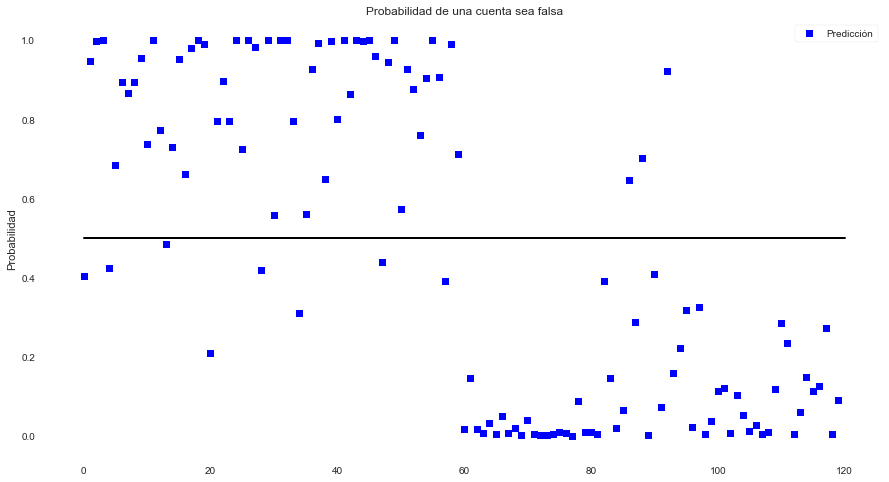

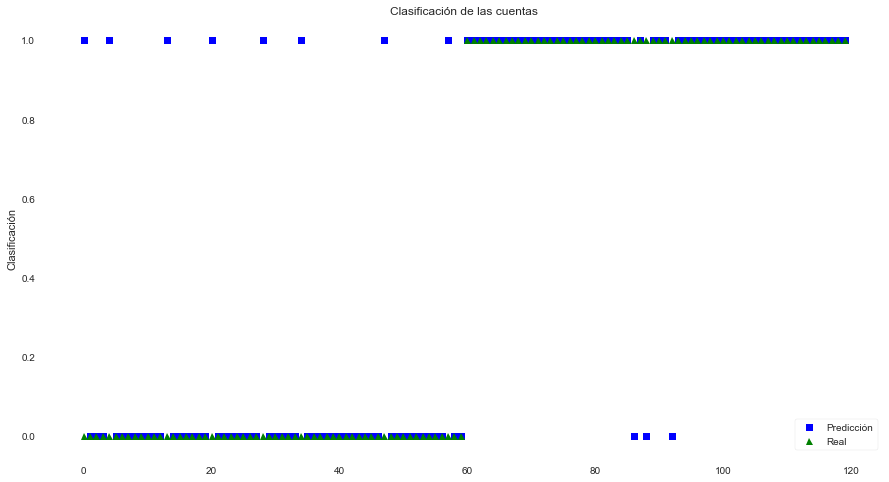

In [40]:
fig = plt.figure(figsize=(15,8))

proba_fake = [i[0] for i in proba]

ax = fig.add_subplot(1,1,1)
ax.plot(proba_fake,'bs',label='Predicción')
ax.plot([0, 120], [0.5, 0.5], 'k-', lw=2)
ax.set(title='Probabilidad de una cuenta sea falsa', 
     ylabel='Probabilidad')
ax.legend()

plt.show()

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.plot(pred,'bs',label='Predicción')
ax.plot(Y_test,'g^',label='Real')
ax.set(title='Clasificación de las cuentas', 
     ylabel='Clasificación')
ax.legend()

plt.show()

## Taller
Con los datos proporcionados en el primer punto, resuelva:


## 1. Diligenciar la siguiente tabla teniendo en cuenta la optimización de parametros por cada uno de los parametros según corresponda.

### Linear regression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
LinearModel = LinearRegression().fit(X_train, y_train)

In [42]:
y_prediction_lineal = LinearModel.predict(X_test)
y_prediction_linealy_prediction_lineal = LinearModel.predict(X_test)
y_prediction_lineal

array([207351.737494  , 622683.4987817 , 226205.853916  , ...,
       436901.4091467 , 492594.7608403 , 647011.23895243])

In [43]:
r2_score(y_prediction_lineal , y_test)

0.5483439258193143

### Polinomial Regression### Polinomial Regression

In [44]:
pf = PolynomialFeatures(degree = 2,interaction_only=True)    # usaremos polinomios de grado 2
X_pol = pf.fit_transform(X)  # transformamos la entrada en polinómica
X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=33)

PolyModel = LinearRegression().fit(X_train_pol, y_train)

In [45]:
y_prediction_poly = PolyModel.predict(X_test_pol)
y_prediction_poly

array([224838.46010966, 667040.96084616, 217245.16425967, ...,
       449666.40504093, 492175.08244236, 656682.30662343])

In [46]:
r2_score(y_prediction_poly , y_test)

0.6259178133887664

### Lasso

In [47]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_train, y_train).best_estimator_

Lasso(alpha=0.03)

In [48]:
LassoModel = Lasso(alpha=0.03).fit(X_train, y_train)

In [49]:
lassoPredictions = LassoModel.predict(X_test)
r2_score(y_test, lassoPredictions)

0.6841698530549931

### Ridge

In [50]:
ridge_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3, 0.5, 1]}
GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_train, y_train).best_estimator_

Ridge(alpha=0.15)

In [51]:
RidgeModel = Ridge(alpha=0.15).fit(X_train, y_train)
RidgePredictions = RidgeModel.predict(X_test)
r2_score(y_test, RidgePredictions)

0.6841618382358199

| Algoritmo | Alpha | Error (R2 Score) |
| --- | --- |--- |
| Regresión Lineal | ---  | 0.5483439258193143 |
| Regresión Polinomial | ---  | 0.6259178133887664 |
| Regresión Ridge (L2) | 0.15  | 0.6841618382358199 |
| Regresión Lasso (L1) | 0.03  | 0.6841698530549931 |

## 2. Realice una tabla en donde pueda validar la varianza y el sesgo para los diferentes modelos

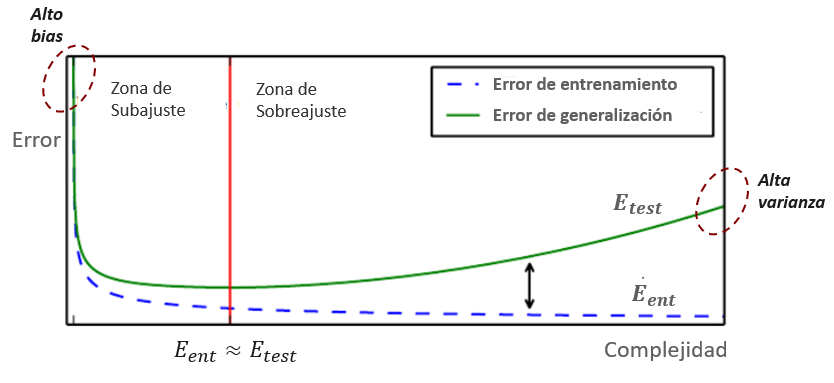

In [171]:
def print_results(model, complexity, train_errors, test_errors, difference, show_plot):
    results_data = {'Complexity': complexity, 'Train errors (MSE)': train_errors, 'Test errors (MSE)': test_errors, 'Difference': difference }
    df = pd.DataFrame(results_data)
    print()
    print(df)
    print()

    if show_plot:
        fig_pl = plt.figure(figsize=(20,10))
        fig_train = plt.figure(figsize=(20,10))
        fig_test = plt.figure(figsize=(20,10))

        pl = fig_pl.add_subplot(111)
        pl_train = fig_train.add_subplot(111)
        pl_test = fig_test.add_subplot(111)

        pl.plot(complexity, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        pl.plot(complexity, np.sqrt(test_errors), "b-", linewidth=3, label="test")
        pl.set(title='Varianza y Bias combinadas (' + model + ')', ylabel='Error', xlabel='Complexity')
        pl.legend()

        pl_train.plot(complexity, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        pl_train.set(title='Varianza y Bias train (' + model + ')', ylabel='Error', xlabel='Complexity')
        pl_train.legend()

        pl_test.plot(complexity, np.sqrt(test_errors), "b-", linewidth=3, label="test")
        pl_test.set(title='Varianza y Bias test (' + model + ')', ylabel='Error', xlabel='Complexity')
        pl_test.legend()

def predict_model(model, X_train, X_test, y_train, y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    return mse_train, mse_test, mse_test - mse_train

def table_linear(X, y):
    train_errors, test_errors, difference = [], [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    LinearModel = LinearRegression().fit(X_train, y_train)
    mse_train, mse_test, diff = predict_model(LinearModel, X_train, X_test, y_train, y_test)
    train_errors.append(mse_train)
    test_errors.append(mse_test)
    difference.append(diff)
    print_results('Linear',[1], train_errors, test_errors, difference, False)

def plot_polynomial_curve(degrees, X, y, show_plot):    
    train_errors, test_errors, difference = [], [], []
    for degree in degrees:
        pf = PolynomialFeatures(degree = degree,interaction_only=True)
        X_pol = pf.fit_transform(X)
        X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=33)
        PolyModel = LinearRegression().fit(X_train_pol, y_train)
        mse_train, mse_test, diff = predict_model(PolyModel, X_train_pol, X_test_pol, y_train, y_test)
        train_errors.append(mse_train)
        test_errors.append(mse_test)
        difference.append(diff)
    print_results('Polynomial',degrees, train_errors, test_errors, difference, show_plot)

def plot_ridge_curve(alphas, X, y, show_plot):
    train_errors, test_errors, difference = [], [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    for alpha in alphas:
        RidgeModel = Ridge(alpha=alpha).fit(X_train, y_train)
        mse_train, mse_test, diff = predict_model(RidgeModel, X_train, X_test, y_train, y_test)
        train_errors.append(mse_train)
        test_errors.append(mse_test)
        difference.append(diff)
    print_results('Ridge', alphas, train_errors, test_errors, difference, show_plot)

def plot_lasso_curve(alphas, X, y, show_plot):
    train_errors, test_errors, difference = [], [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    for alpha in alphas:
        LassoModel = Lasso(alpha=alpha).fit(X_train, y_train)
        mse_train, mse_test, diff = predict_model(LassoModel, X_train, X_test, y_train, y_test)
        train_errors.append(mse_train)
        test_errors.append(mse_test)
        difference.append(diff)
    print_results('Lasso', alphas, train_errors, test_errors, difference, show_plot)
        

In [159]:
table_linear(X, y)


   Complexity  Train errors (MSE)  Test errors (MSE)    Difference
0           1        1.458821e+10       1.510189e+10  5.136813e+08



In [164]:
degrees_polynomial = [2,3,4,5]
show_plot = False
plot_polynomial_curve(degrees_polynomial, X, y, show_plot)


   Complexity  Train errors (MSE)  Test errors (MSE)    Difference
0           2        1.265794e+10       1.339720e+10  7.392591e+08
1           3        1.123273e+10       1.520591e+10  3.973179e+09
2           4        9.234888e+09       2.590582e+12  2.581347e+12
3           5        6.797562e+09       6.707003e+16  6.707002e+16




    Complexity  Train errors (MSE)  Test errors (MSE)    Difference
0        0.000        1.458821e+10       1.510189e+10  5.136813e+08
1        0.020        1.458821e+10       1.510193e+10  5.137217e+08
2        0.024        1.458821e+10       1.510194e+10  5.137299e+08
3        0.025        1.458821e+10       1.510195e+10  5.137320e+08
4        0.026        1.458821e+10       1.510195e+10  5.137340e+08
5        0.030        1.458821e+10       1.510196e+10  5.137423e+08
6        0.050        1.458822e+10       1.510200e+10  5.137840e+08
7        0.070        1.458822e+10       1.510205e+10  5.138265e+08
8        0.100        1.458824e+10       1.510213e+10  5.138919e+08
9        0.150        1.458827e+10       1.510227e+10  5.140046e+08
10       0.200        1.458831e+10       1.510243e+10  5.141219e+08
11       0.300        1.458841e+10       1.510278e+10  5.143684e+08
12       0.500        1.458873e+10       1.510363e+10  5.149014e+08
13       1.000        1.458991e+10       1.5106

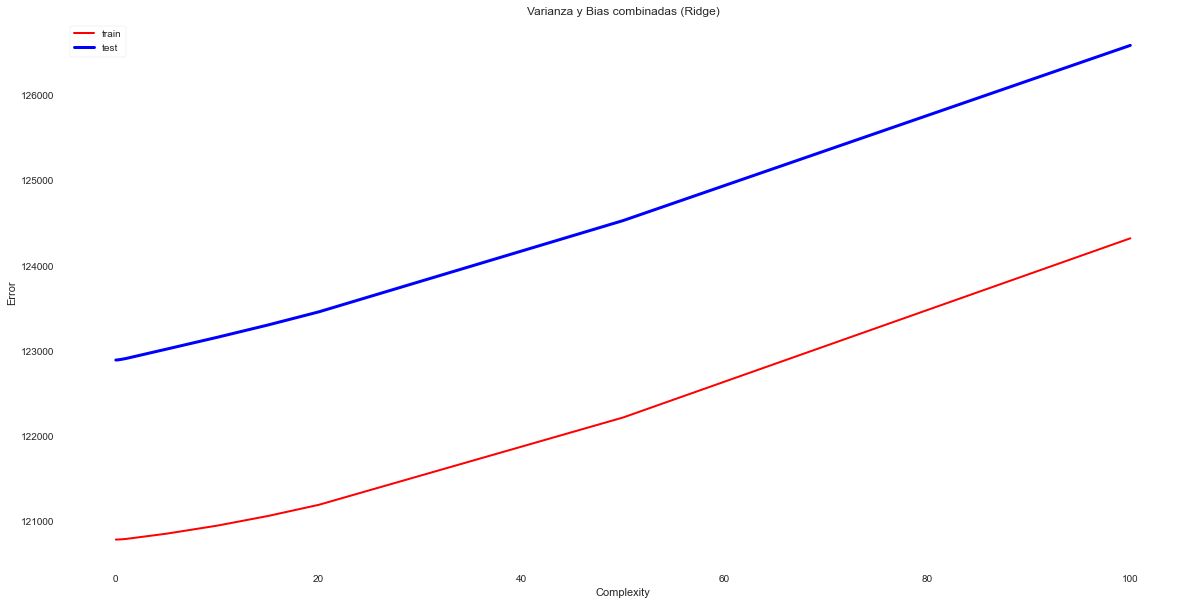

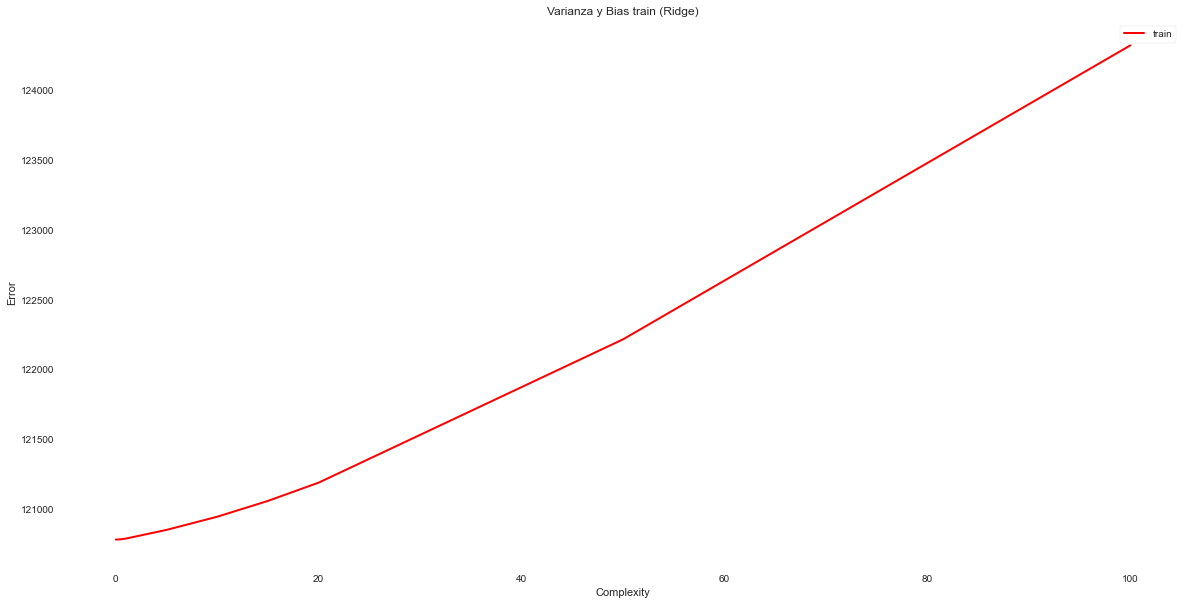

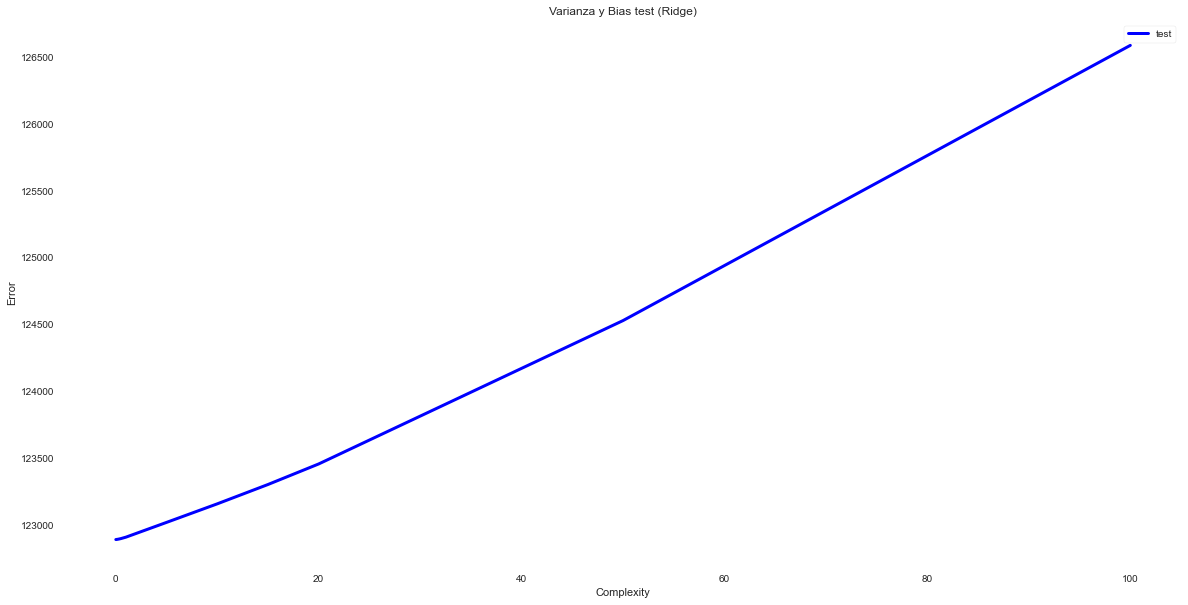

In [176]:
alphas_ridge = [0, 0.02, 0.024, 0.025, 0.026, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3, 0.5, 1, 5, 10, 15, 20, 50, 100]
show_plot = True
plot_ridge_curve(alphas_ridge, X, y, show_plot)


    Complexity  Train errors (MSE)  Test errors (MSE)    Difference
0        0.000        1.458821e+10       1.510189e+10  5.136813e+08
1        0.020        1.458821e+10       1.510189e+10  5.136775e+08
2        0.024        1.458821e+10       1.510189e+10  5.136767e+08
3        0.025        1.458821e+10       1.510189e+10  5.136765e+08
4        0.026        1.458821e+10       1.510189e+10  5.136763e+08
5        0.030        1.458821e+10       1.510189e+10  5.136755e+08
6        0.050        1.458821e+10       1.510188e+10  5.136717e+08
7        0.070        1.458821e+10       1.510188e+10  5.136678e+08
8        0.100        1.458821e+10       1.510187e+10  5.136620e+08
9        0.150        1.458821e+10       1.510186e+10  5.136524e+08
10       0.200        1.458821e+10       1.510186e+10  5.136429e+08
11       0.300        1.458821e+10       1.510184e+10  5.136241e+08
12       0.500        1.458821e+10       1.510180e+10  5.135868e+08
13       1.000        1.458822e+10       1.5101

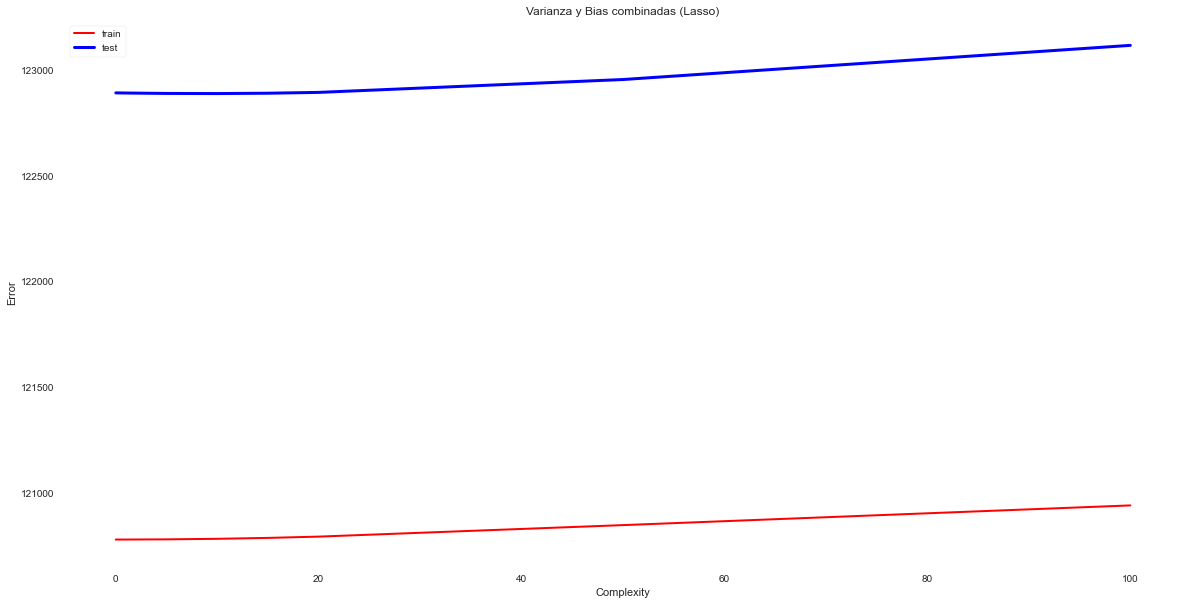

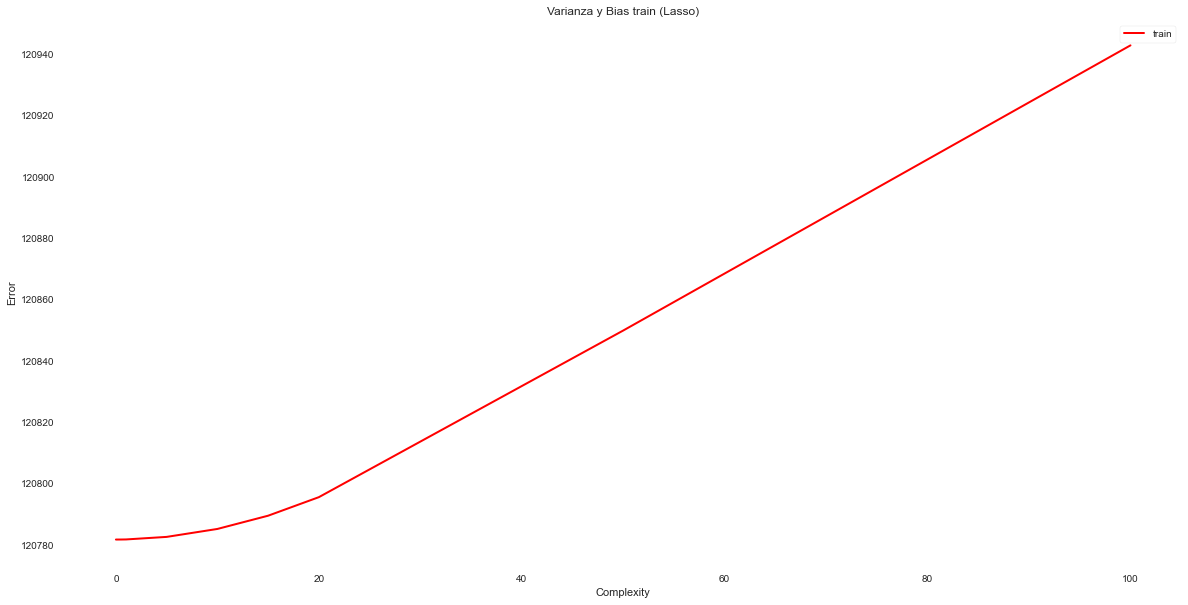

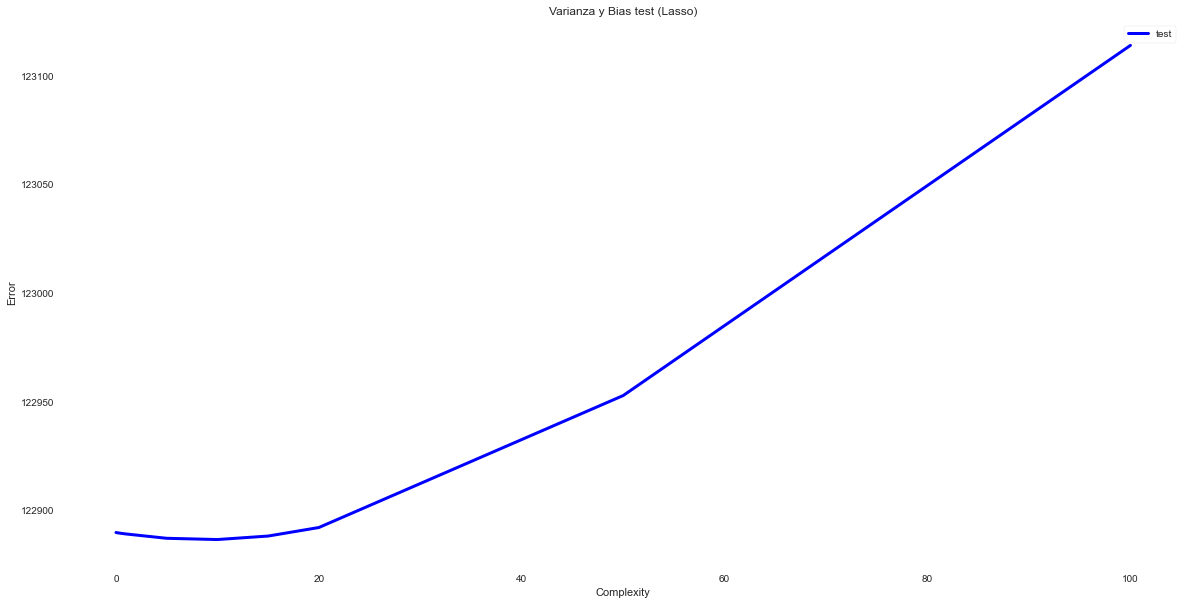

In [177]:
alphas_lasso = [0, 0.02, 0.024, 0.025, 0.026, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3, 0.5, 1, 5, 10, 15, 20, 50, 100]
show_plot = True
plot_lasso_curve(alphas_lasso, X, y, show_plot)

## Conlusiones punto 1

Se puede ver como agregar un termino de regularización, por medio de los alphas de los modelos Ridge y Lasso, nos arroja mejores resultados en la medida de error R2. Esto quiere decir que el hiperparámetro de regularización es muy útil a la hora de implementar algoritmos de predicción.

Por otro lado, aprendimos que cuando el alpha es cero, los resultados de error son exactamente iguales que los de la regresión lineal normal. Sin embargo, a medida que el alpha aumenta, la complejidad del modelo cambia ya que se penalizan parámetros del modelo. También podemos ver como a medida que la complejidad del modelo crece vamos obteniendo una mayor diferencia entre el error de entrenamiento y el de test (mayor varianza).

## 3. Con los datos del segundo punto:

## 3.1. Realice un ajuste de hiperparámetros para los valores de `C` y `penalty` en la regresión logística. La idea es lograr un mejor resultado al proporcionado por el modelo por defecto.

In [52]:
X_train, Y_train = train.drop(['fake'],axis=1), train['fake']
X_test, Y_test = test.drop(['fake'],axis=1), test['fake']

rng = np.random.RandomState(22)
param_grid = {
    'C': [0.001, 0.01, 0.9, 1, 5, 10, 15, 20, 25, 30],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'random_state': [rng]
}

grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid, scoring='f1', return_train_score=True)
grid_search_log_reg.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.9, 1, 5, 10, 15, 20, 25, 30],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [RandomState(MT19937) at 0x127000E20]},
             return_train_score=True, scoring='f1')

In [53]:
grid_search_log_reg.best_params_

{'C': 15, 'penalty': 'l2', 'random_state': RandomState(MT19937) at 0x127000E20}

In [54]:
grid_search_log_reg.best_estimator_

LogisticRegression(C=15, random_state=RandomState(MT19937) at 0x1294F6050)

In [55]:
grid_search_log_reg.best_score_

0.9080522358534922

In [56]:
cv_results_df = pd.DataFrame(grid_search_log_reg.cv_results_) 
cv_results_dfcv_results_df = pd.DataFrame(grid_search_log_reg.cv_results_) 
#cv_results_df

In [57]:
optimal_regression = LogisticRegression(C=15, penalty='l2', random_state=rng)
optimal_regression.fit(X_train, Y_train)

LogisticRegression(C=15, random_state=RandomState(MT19937) at 0x127000E20)

In [58]:
report_train = classification_report(Y_train, regression.predict(X_train))
report_test = classification_report(Y_test, regression.predict(X_test))
print("Original Train Report \n", report_train)
print("Original Test Report \n", report_test)

report_train = classification_report(Y_train, optimal_regression.predict(X_train))
report_test = classification_report(Y_test, optimal_regression.predict(X_test))

print("Optimal Train Report \n", report_train)
print("Optimal Test Report \n", report_test)

Original Train Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       288
           1       0.92      0.91      0.91       288

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576

Original Test Report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.88      0.95      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120

Optimal Train Report 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       288
           1       0.92      0.90      0.91       288

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weig

## 3.2. Con el mejor modelo encontrado, realice una gráfica de precisión-sensibilidad variando el umbral de selección para ambas clases [0,1].

In [62]:
def classify_with_threshold(probability, threshold):
    if probability > threshold:
        return 1
    else:
        return 0

In [63]:
threshold = 0.85
optimal_proba = optimal_regression.predict_proba(X_test)
optimal_pred = optimal_regression.predict(X_test)
optimal_manual_pred = [classify_with_threshold(x[1],threshold) for x in optimal_proba]
#['Prediccion: {0} -- Probabilidad 0: {1:.2f} / Probabilidad 1:  {2:.2f}'.format(optimal_manual_pred[i],p[0],p[1]) for i,p in enumerate(optimal_proba)]

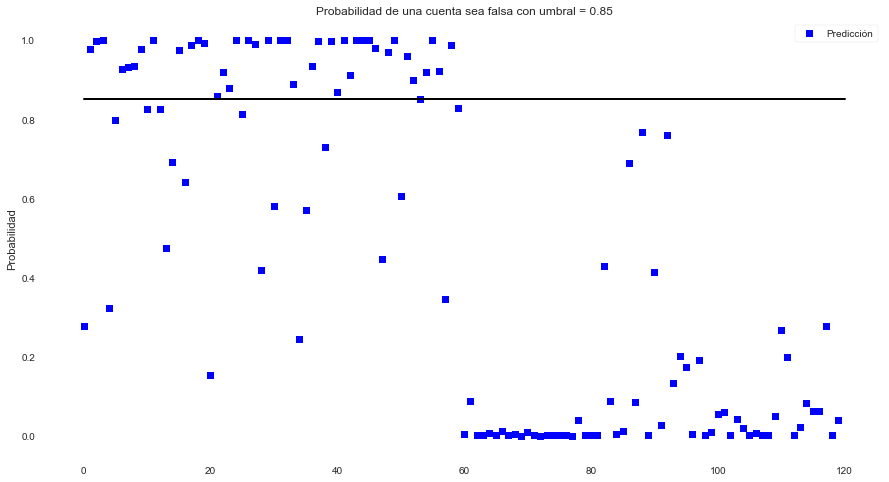

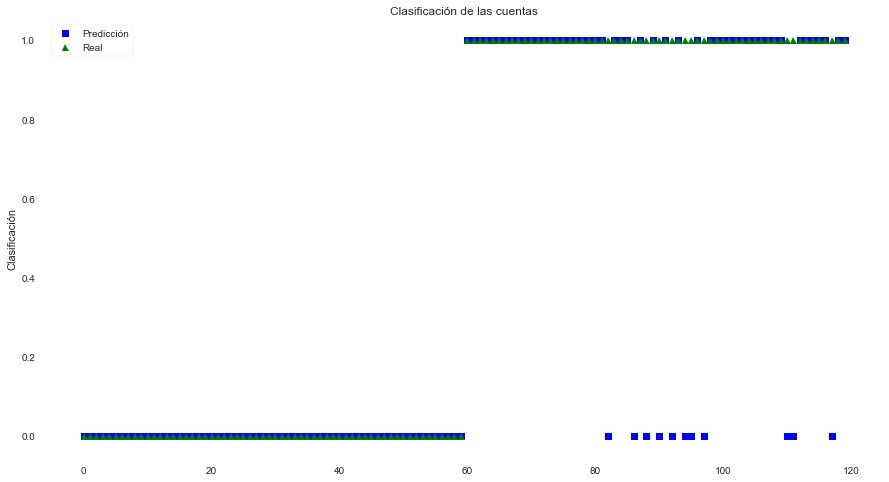

In [64]:
fig = plt.figure(figsize=(15,8))

optimal_proba_fake = [i[0] for i in optimal_proba]

ax = fig.add_subplot(1,1,1)
ax.plot(optimal_proba_fake,'bs',label='Predicción')
ax.plot([0, 120], [threshold, threshold], 'k-', lw=2)
ax.set(title='Probabilidad de una cuenta sea falsa con umbral = ' + str(threshold), 
     ylabel='Probabilidad')
ax.legend()

plt.show()

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.plot(optimal_manual_pred,'bs',label='Predicción')
ax.plot(Y_test,'g^',label='Real')
ax.set(title='Clasificación de las cuentas', 
     ylabel='Clasificación')
ax.legend()

plt.show()

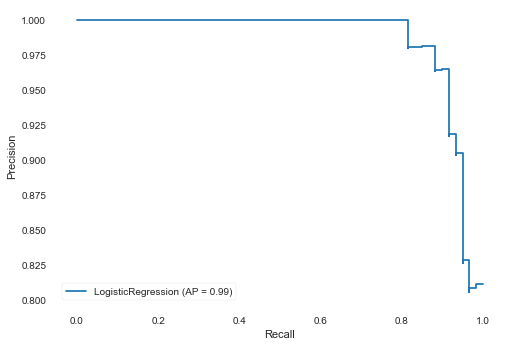

In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(optimal_regression, X_test, Y_test)

## Conclusiones punto 2

En este caso de clasificación se usó un clasificador logístico que tiene por defecto un umbral de 0.5. En el primer punto variamos el hiperparámetro C y el penalty logrando obtener un resultado ligeramente superior. Nuevamente observamos que el cambio de hiperparámetros puede llegar a mejorar el rendimiento del algoritmo.

Por otro lado también observamos que al variar el umbral del algoritmo podemos mejorar significativamente la precisión (o el recall) en uno de los dos casos (cero o uno). Pero por lo general esto viene a costa de la precisión o recall del otro componente. Sin embargo vemos que puede ser útil esta variación si se requiere aumentar uno de las dos medidas en alguna de las clases.